# **Import & Install Library**

In [4]:
import sys

import tensorflow
import pandas as pd
import sklearn as sk
import tensorflow as tf

check_gpu = len(tf.config.list_physical_devices('GPU'))>0

print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print("GPU is", "available" if check_gpu \
      else "NOT AVAILABLE")

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024)])
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

Tensor Flow Version: 2.4.1
Keras Version: 2.4.0

Python 3.7.10 (default, Feb 26 2021, 13:06:18) [MSC v.1916 64 bit (AMD64)]
Pandas 1.2.4
Scikit-Learn 0.24.1
GPU is available
Num GPUs Available:  1
1 Physical GPUs, 1 Logical GPUs


In [7]:
#Import library preprocessing
#from google.colab import files
import random as rd
import zipfile, os # Library untuk mendownload zipfile
from tqdm import tqdm # Sebagai pemanis visual saat mengimport gambar ke dalam array list
import numpy as np  # Library untuk mengubah gambar menjadi array
import tensorflow as tf # Library Tensorflow
from tensorflow.keras.optimizers import RMSprop # Mengimport optimizer untuk model
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Library untuk Augmentasi gambar
from tensorflow.keras import regularizers # Library untuk mencegah overfitting pada model
from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint # Mengimport learningrate dan model checkpoint
from sklearn.preprocessing import LabelEncoder # Untuk mengubah index menjadi string label
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical # Untuk melabeli gambar
import cv2 # Mengimport gambar

#Import library visualisasi
import matplotlib.image as mpimg  # Library untuk visualisai gambar dengan plot
import matplotlib.pyplot as plt # Library untuk visualisai plot
%matplotlib inline
import seaborn as sns # Library untuk visualisai plot lebih bagus

from sklearn.metrics import confusion_matrix # Untuk evaluasi model

In [8]:
# Install library split_folders
#!pip install split_folders #buat colab
import splitfolders

# **Import Dataset**

Mendownload Dataset Keretakan yang diambil dari Google Images dan telah dimasukkan ke dalam Dropbox

In [9]:
# Mendownload dataset cupang menggunakan wget

# !wget --no-check-certificate \
#   https://dl.dropbox.com/s/dgs42o0l8jpuq34/Bangunan_Retak.zip?dl=2 \
#   -O /tmp/bangunan-retak.zip

In [12]:
# Mengekstrak folder zip yang telah terdownload
#local_zip = '/tmp/bangunan-retak.zip' #colab
local_zip = 'bangunan_retak.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
#zip_ref.extractall('/tmp') # colab
zip_ref.extractall()
zip_ref.close()
 
#base_dir = '/tmp/bangunan-retak' #colab

Folder yang telah terekstrak akan terlihat seperti ini:
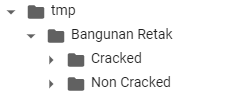

# **Data Preprocessing**

In [14]:
# Memakai library split_folders untuk membagi data train dan validasi
# import splitfolders

# Membagi data train dan validasi dengan perbandingan 80% : 20%
# splitfolders.ratio('/tmp/Bangunan Retak', output="dataset", seed=43, ratio=(.8, .2)) 

# di uncomment trus sekali run aja
# splitfolders.fixed('Bangunan Retak', output="datasets", seed=43, fixed=(1000)) # Sekali run aja


Copying files: 0 files [00:00, ? files/s]
Copying files: 1 files [00:00,  1.71 files/s]
Copying files: 31 files [00:00, 60.04 files/s]
Copying files: 57 files [00:00, 103.06 files/s]
Copying files: 84 files [00:00, 142.56 files/s]
Copying files: 114 files [00:00, 181.41 files/s]
Copying files: 143 files [00:01, 209.54 files/s]
Copying files: 173 files [00:01, 233.62 files/s]
Copying files: 201 files [00:01, 242.78 files/s]
Copying files: 229 files [00:01, 251.87 files/s]
Copying files: 259 files [00:01, 264.13 files/s]
Copying files: 288 files [00:01, 271.23 files/s]
Copying files: 317 files [00:01, 275.08 files/s]
Copying files: 347 files [00:01, 280.73 files/s]
Copying files: 376 files [00:01, 276.13 files/s]
Copying files: 405 files [00:02, 276.13 files/s]
Copying files: 433 files [00:02, 272.49 files/s]
Copying files: 461 files [00:02, 270.72 files/s]
Copying files: 489 files [00:02, 264.95 files/s]
Copying files: 516 files [00:02, 264.78 files/s]
Copying files: 543 files [00:02, 

In [15]:
# Menentukan path data train dan validasi
# path = "/content/dataset/" # colab
path = "datasets/"
train_dir = path + "train" 
validation_dir = path + "val"

In [16]:
print(train_dir)
print(validation_dir)

datasets/train
datasets/val


Splitting akan terlihat seperti gambar di berikut ini:
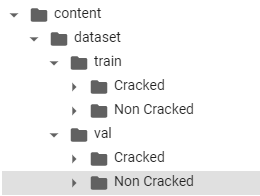

## Memasukkan Data Validasi ke dalam Array List

In [17]:
# print(os.listdir('/tmp/Bangunan Retak')) # colab
print(os.listdir('Bangunan Retak'))

['Cracked', 'Non Cracked']


In [18]:
X = []
Z = []
# cracked = "/content/dataset/val/Cracked" # colab
# non_cracked = "/content/dataset/val/Non Cracked" # colab
cracked = "datasets/val/Cracked"
non_cracked = "datasets/val/Non Cracked"

Mendefinisikan Fungsi untuk memasukkan image ke dalam list array

In [19]:
def assign_label(img, gbk): #gbk gambar ikan
    return gbk

def val_data(gbk,DIR): 
    for img in tqdm(os.listdir(DIR)):
        label= assign_label(img, gbk)
        path= os.path.join(DIR,img)
        img= cv2.imread(path,cv2.IMREAD_COLOR)
        img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Warna menjadi RGB
        img= cv2.resize(img, (150,150)) # ukuran gambar menjadi 150 x 150 pixel
        
        X.append(np.array(img))
        Z.append(str(label))
        

Menggabungkan Cracked dan Non Cracked ke dalam 1 list

In [20]:
val_data('cracked', cracked)
print(len(X))


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 273.76it/s]

1000


In [21]:
val_data('non_cracked', non_cracked)
print(len(X))


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 293.36it/s]

2000


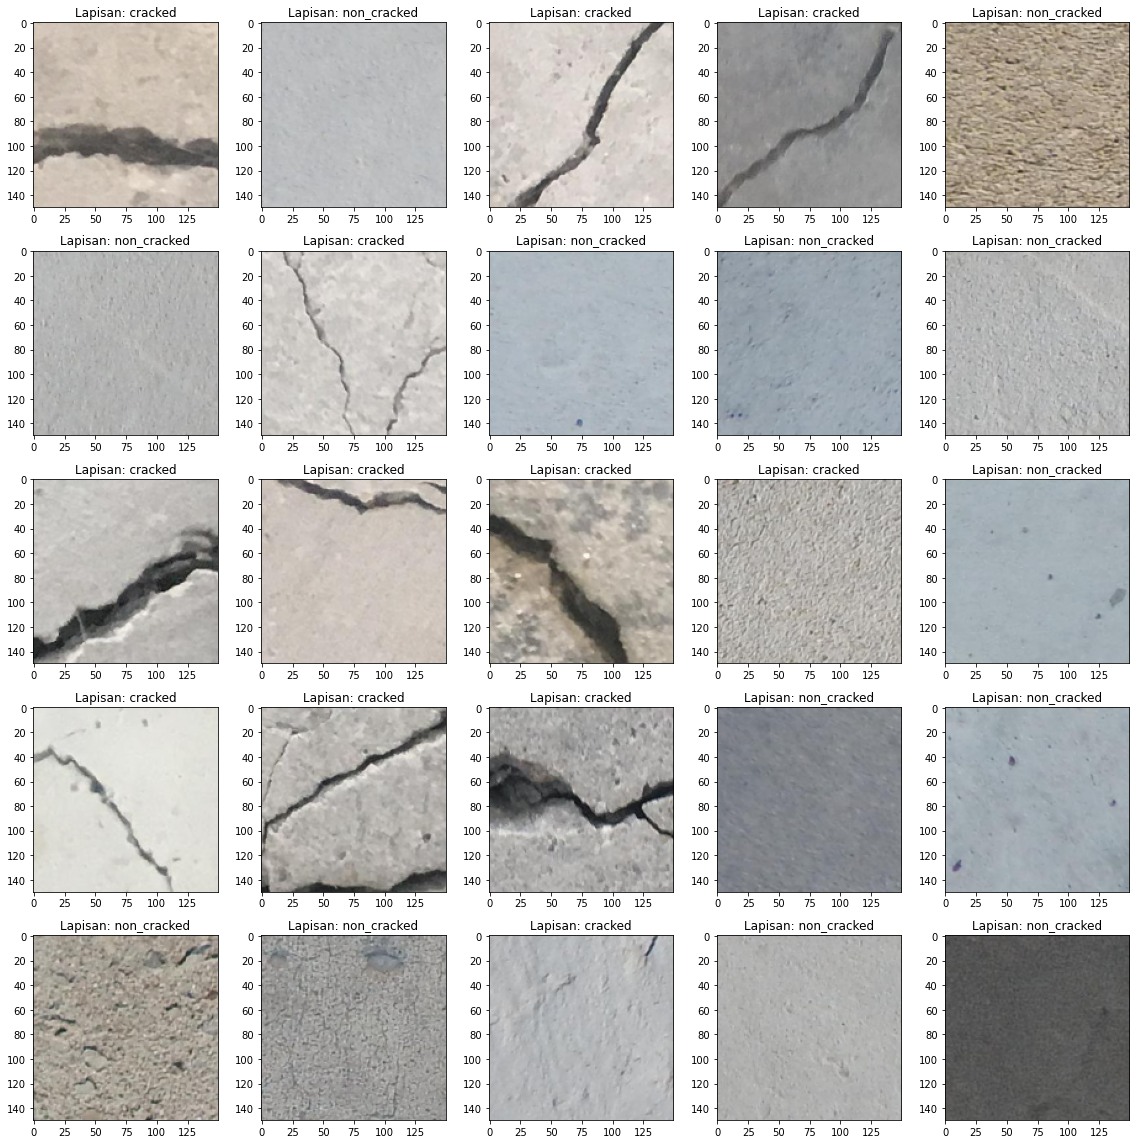

In [22]:
# Menampilkan gambar validasi dengan acak
fig,ax=plt.subplots(5,5)
fig.set_size_inches(16,16)
for i in range(5):
    for j in range (5):
        gamb=rd.randint(0,len(Z))
        ax[i,j].imshow(X[gamb])
        ax[i,j].set_title('Lapisan: '+Z[gamb])
        
plt.tight_layout()

## Augmentasi

Melakukan Augmentasi gambar untuk menciptakan data/gambar baru dari data yang telah ada

In [23]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    zoom_range = 0.1, # mengubah zoom image 
                    width_shift_range=0.1,  # mengubah image secara horizontal
                    height_shift_range=0.1, # mengubah image secara vertikal
                    #validation_split=0.15,featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False)  
                    
 
test_datagen = ImageDataGenerator(
                    rescale=1./255#,
                    #rotation_range=20,
                    #horizontal_flip=True
                    )
                   

In [24]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=12,
        class_mode='binary') # karena ini merupakan masalah klasifikasi dari 2 kelas maka menggunakan class_mode = 'binary'
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=1, 
        class_mode='binary') # karena ini merupakan masalah klasifikasi dari 2 kelas maka menggunakan class_mode = 'binary'

Found 94092 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


# **Modelling**

In [25]:
# Fungsi untuk menyimpan model
save_direc = os.path.join(os.getcwd(), '/content/sample_data')

model_name = 'rusak_ringan_weight.h5'

# Create Directory if it doesn't exist
if not os.path.isdir(save_direc):
    os.makedirs(save_direc)
# Join the directory with the model file
modelpath = os.path.join(save_direc, model_name)

checkpoint = ModelCheckpoint(filepath = modelpath, verbose = 1, save_best_only = True,
                             save_weights_only = True, save_freq=1)

In [26]:
# Inisialisasi class untuk menghentikan proses training apabila akurasi validasi telah diatas 93%
class myCallBack(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.935):
      print("\nAkurasi telah mencapai >93%!")
      self.model.stop_training = True
myCallBack = myCallBack()

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), padding='Same', activation='relu',  input_shape=(150, 150, 3)),
    tf.keras.layers.Conv2D(32, (5,5), padding='Same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (5,5), padding='Same', activation='relu'),
    #tf.keras.layers.Conv2D(64, (3,3), padding='Same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), # mereduksi resolusi gambar
    tf.keras.layers.Dropout(0.2), # agar model tidak overfitting

    tf.keras.layers.Conv2D(128, (3,3), padding='Same', activation='relu'),
    #tf.keras.layers.Conv2D(128, (3,3), padding='Same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), # mereduksi resolusi gambar
    tf.keras.layers.Dropout(0.3), # agar model tidak overfitting

    tf.keras.layers.Conv2D(128, (3,3), padding='Same', activation='relu'),
    #tf.keras.layers.Conv2D(256, (3,3), padding='Same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), # mereduksi resolusi gambar
    tf.keras.layers.Dropout(0.3), # agar model tidak overfitting

    tf.keras.layers.Flatten(),  
    tf.keras.layers.Dense(256, kernel_regularizer=regularizers.l2(0.001), activation='relu'), # Hidden layer
    tf.keras.layers.Dropout(0.5), # agar model tidak overfitting
    tf.keras.layers.Dense(1, activation='sigmoid') # 2 label output lalu menggunakan sigmoid karena model adalah klasifikasi kategori
])

model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.RMSprop(learning_rate=0.0001), #Menggunakan optimizer rmsprop
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 32)      25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 128)       7

In [ ]:
hist=model.fit(
      train_generator,
      steps_per_epoch=35,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=300, # jumlah maksimal epoch yang akan di eksekusi
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      callbacks=[myCallBack],#, checkpoint],
      batch_size=64,
      #validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)


Epoch 1/300
35/35 - 44s - loss: 1.0373 - accuracy: 0.7429 - val_loss: 1.1265 - val_accuracy: 0.5000
Epoch 2/300
35/35 - 10s - loss: 0.9844 - accuracy: 0.7310 - val_loss: 1.0473 - val_accuracy: 0.5000
Epoch 3/300
35/35 - 10s - loss: 0.9613 - accuracy: 0.6714 - val_loss: 0.9824 - val_accuracy: 0.5000
Epoch 4/300
35/35 - 10s - loss: 0.8513 - accuracy: 0.7262 - val_loss: 0.9327 - val_accuracy: 0.5000
Epoch 5/300
35/35 - 10s - loss: 0.8165 - accuracy: 0.7024 - val_loss: 0.8819 - val_accuracy: 0.5000
Epoch 6/300
35/35 - 10s - loss: 0.7532 - accuracy: 0.7310 - val_loss: 0.8474 - val_accuracy: 0.5000
Epoch 7/300
35/35 - 10s - loss: 0.7354 - accuracy: 0.7167 - val_loss: 0.8534 - val_accuracy: 0.5000
Epoch 8/300
35/35 - 10s - loss: 0.6909 - accuracy: 0.7238 - val_loss: 0.8637 - val_accuracy: 0.5000
Epoch 9/300
35/35 - 10s - loss: 0.7265 - accuracy: 0.6762 - val_loss: 0.7824 - val_accuracy: 0.5000
Epoch 10/300
35/35 - 10s - loss: 0.6958 - accuracy: 0.6905 - val_loss: 0.7629 - val_accuracy: 0.5000

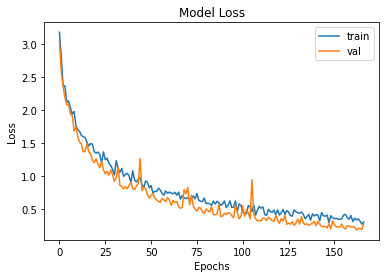

In [ ]:
# Menampilkan plot loss dari model
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

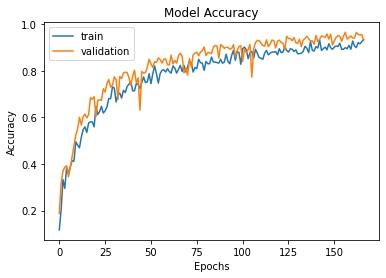

In [ ]:
# Menampilkan plot akurasi dari model
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

Model Tensorflow yang sudah di training di-convert menjadi tflite menggunakan TFLiteConverter.

In [ ]:
saved_model_dir = 'save/model_tflite/' # Membuat directory untuk menuimpan model
tf.saved_model.save(model, saved_model_dir) # Menyimpan model

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir) # Konversi model menjadi tflite
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f: # Membuat model tflite ke dalam directory
  f.write(tflite_model)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: save/model_tflite/assets


Sehingga model tflite akan terlihat seperti ini:
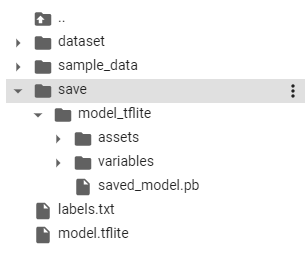

Membuat Label untuk kelas klasifikasi

In [ ]:
print (train_generator.class_indices)

labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labels.txt', 'w') as f:
  f.write(labels)

In [ ]:
!cat labels.txt # Melihat isi file label berformat txt yang telah dibuat

In [ ]:
# Membuat dictionary
dic = {'cracked': '0', 'non_cracked': '1'}
Z2 = [dic.get(n, n) for n in Z]

Melabelkan array yang sudah ada di list array

In [ ]:
# Melabelkan list Y menjadi 10 kategori
le= LabelEncoder()
Y= le.fit_transform(Z2)
Y= to_categorical(Y,10)

# Merubah List X menjadi Array lalu menormalisasikannya
X_test= np.array(X)
X_test= X_test/255

Evaluasi Model dengan Confusion Matrix, Precision, Recall & F1-Score

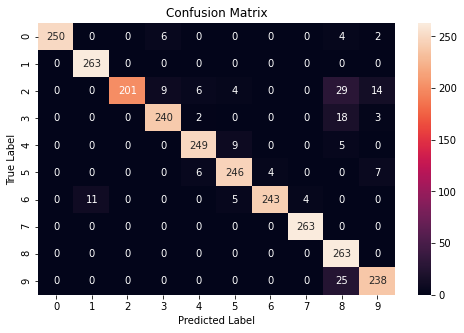

In [ ]:
#Mengevaluasi model dengan confussion matrix

pred= model.predict(X_test)
y_pred= np.argmax(pred, axis=1)
y_true= np.argmax(Y, axis=1)
cm = confusion_matrix(y_true, y_pred)

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm, annot=True, fmt=".0f", ax=ax)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# Evaluasi model dengan precision, recall & f1-score
from sklearn.metrics import classification_report
print (classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98       262
           1       0.96      1.00      0.98       263
           2       1.00      0.76      0.87       263
           3       0.94      0.91      0.93       263
           4       0.95      0.95      0.95       263
           5       0.93      0.94      0.93       263
           6       0.98      0.92      0.95       263
           7       0.99      1.00      0.99       263
           8       0.76      1.00      0.87       263
           9       0.90      0.90      0.90       263

    accuracy                           0.93      2629
   macro avg       0.94      0.93      0.93      2629
weighted avg       0.94      0.93      0.93      2629



# **Prediksi Model**

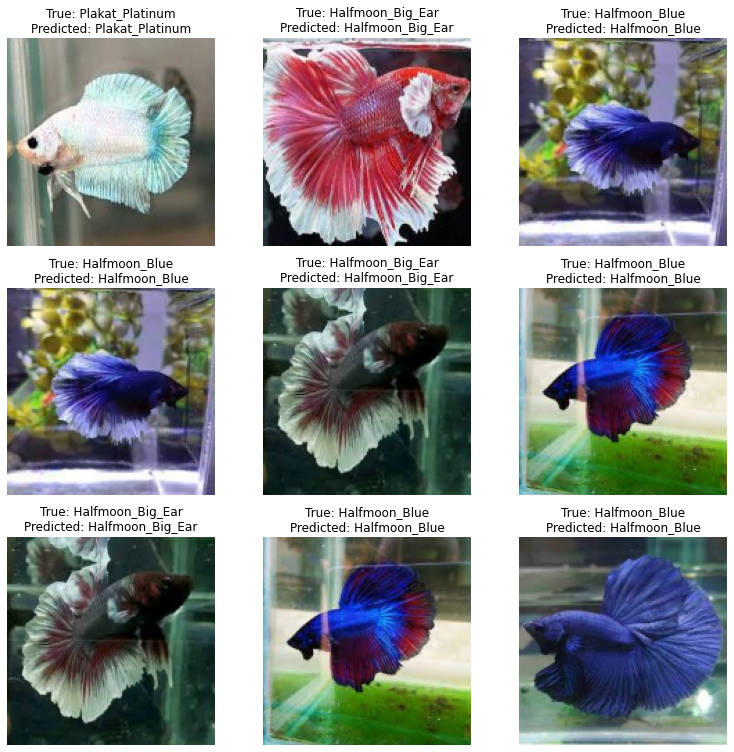

In [ ]:
dict_label = {0:'cracked', 1:'non_cracked'}
def predict():
  random_data = np.random.randint(low = 0, high = len(X)-1, size=6)
  sample_images = X_test[random_data]
  sample_label = Y[random_data]
  predicted = model.predict(sample_images) # Memprediksi model
  predicted = np.argmax(predicted, axis=1) # Mengembalikan nilai terbesar dari array prediksi
  true_label = np.argmax(sample_label, axis=1) # Mengembalikan nilai terbesar dari array sample_label
  fig, axs = plt.subplots(3, 3)
  fig.set_size_inches(13,13)
  for row in range(3):
    for col in range(3):
      if row == 0:
        true = true_label[row+col]
        pred = predicted[row+col]
        axs[row, col].imshow(sample_images[row+col])
      else:
        true = true_label[row+col+1]
        pred = predicted[row+col+1]
        axs[row, col].imshow(sample_images[row+col+1])
      axs[row, col].set_title('True: %s\nPredicted: %s' % (dict_label[true], dict_label[pred]))
      axs[row, col].axis('off')

predict()

Saving HalfmoonMulticolor (6).jpg to HalfmoonMulticolor (6).jpg
[4]
Halfmoon_Multicolor


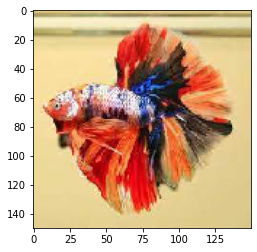

In [ ]:
# Mengupload dan memprediksi gambar baru yang telah diupload
# Apabila run pertama error maka harus dirun 2x
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # memprediksi gambar
    path = fn
    img = image.load_img(path, target_size=(150,150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
 
    images = np.vstack([x])
    pred = model.predict(images, batch_size=10)
    classes = np.argmax(pred,axis=1)
  
    print(classes)
    if classes == 0:
      print('cracked')
#     elif classes == 1:
#       print('rusak_berat')
#     elif classes == 2:
#       print('rusak_sedang')  
    else :
      print('non_cracked')
  